In [1]:
from PIL import Image
import glob
import os
import numpy as np
import matplotlib.pyplot as plt # for visualization
import tensorflow as tf
from tensorflow import keras

### Resize Data images

In [2]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 -> 56x56 사이즈로 바꾸어 저장합니다.
	target_size=(56,56)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
# 		new_gary_img=new_img.convert('L')
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
    
# 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/AI_study/rock_scissor_paper/data/scissor"
resize_images(image_dir_path)
    
image_dir_path = os.getenv("HOME") + "/aiffel/AI_study/rock_scissor_paper/data/rock"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/AI_study/rock_scissor_paper/data/paper"
resize_images(image_dir_path)

print("data 이미지 resize 완료!")

1200  images to be resized.
1200  images resized.
1200  images to be resized.
1200  images resized.
1200  images to be resized.
1200  images resized.
data 이미지 resize 완료!


###  Test Data Resized

In [3]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 -> 56x56 사이즈로 바꾸어 저장합니다.
	target_size=(56,56)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
# 		new_gary_img=new_img.convert('1')
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 테스트 가위, 바위, 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/AI_study/rock_scissor_paper/data/test/scissor"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/AI_study/rock_scissor_paper/data/test/rock"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/AI_study/rock_scissor_paper/data/test/paper"
resize_images(image_dir_path)

print("테스트 이미지 resize 완료!")

130  images to be resized.
130  images resized.
130  images to be resized.
130  images resized.
130  images to be resized.
130  images resized.
테스트 이미지 resize 완료!


### Data labeling

In [4]:
def load_data(img_path, number_of_data=3600):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=56  # 28 -> 56
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/AI_study/rock_scissor_paper/data"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화
# print(x_train_norm)

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 3600 입니다.
x_train shape: (3600, 56, 56, 3)
y_train shape: (3600,)


라벨:  0


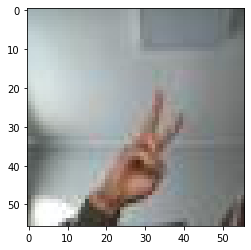

In [5]:
# 이미지 불러오기
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

### load test Data

In [54]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
# [[YOUR CODE]]
def load_data2(img_path, number_of_data=390):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=56
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/AI_study/rock_scissor_paper/data/test"
(x_test, y_test)=load_data2(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_test)의 이미지 개수는 390 입니다.
x_test shape: (390, 56, 56, 3)
y_test shape: (390,)


### 딥러닝 네트워크 설계하기

In [64]:
# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
# [[YOUR CODE]]

n_channel_1=8
n_channel_2=16
n_channel_3=32
n_channel_4=64
n_dense=64
n_train_epoch=16

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(56,56,3))) # rgb라 1 -> 3으로 바꿈
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Dropout(0.05))

model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.05))

model.add(keras.layers.Conv2D(n_channel_3, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.05))

model.add(keras.layers.Conv2D(n_channel_4, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.05))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax')) # 최종 분류기의 Class수이다. 주먹, 가위, 보 3종류이므로 10 -> 3

model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_64 (Conv2D)           (None, 54, 54, 8)         224       
_________________________________________________________________
max_pooling2d_64 (MaxPooling (None, 27, 27, 8)         0         
_________________________________________________________________
dropout_64 (Dropout)         (None, 27, 27, 8)         0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 25, 25, 16)        1168      
_________________________________________________________________
max_pooling2d_65 (MaxPooling (None, 12, 12, 16)        0         
_________________________________________________________________
dropout_65 (Dropout)         (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 10, 10, 32)      

### 모델 학습

In [65]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
# [[YOUR CODE]]

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=n_train_epoch)

Epoch 1/16
113/113 [==============================] - 1s 4ms/step - loss: 2.1534 - accuracy: 0.4044
Epoch 2/16
113/113 [==============================] - 0s 4ms/step - loss: 0.9251 - accuracy: 0.5356
Epoch 3/16
113/113 [==============================] - 0s 4ms/step - loss: 0.7293 - accuracy: 0.6461
Epoch 4/16
113/113 [==============================] - 1s 5ms/step - loss: 0.6404 - accuracy: 0.6736
Epoch 5/16
113/113 [==============================] - 0s 4ms/step - loss: 0.5753 - accuracy: 0.7233
Epoch 6/16
113/113 [==============================] - 0s 4ms/step - loss: 0.4875 - accuracy: 0.7789
Epoch 7/16
113/113 [==============================] - 0s 4ms/step - loss: 0.4393 - accuracy: 0.8069
Epoch 8/16
113/113 [==============================] - 0s 4ms/step - loss: 0.3667 - accuracy: 0.8372
Epoch 9/16
113/113 [==============================] - 0s 4ms/step - loss: 0.3210 - accuracy: 0.8683
Epoch 10/16
113/113 [==============================] - 0s 4ms/step - loss: 0.3066 - accuracy: 0.8636

### 모델 평가

In [66]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

13/13 - 0s - loss: 1.1003 - accuracy: 0.4282
test_loss: 1.1003086566925049 
test_accuracy: 0.42820513248443604


In [ ]:
# 10/10 - 0s - loss: 1.1048 - accuracy: 0.3333
# test_loss: 1.1047967672348022 
# test_accuracy: 0.3333333432674408